In [5]:
#===============================================================================
# %%
# IMPORT PACKAGES
import os
from pandas import DataFrame
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
# import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from geodatasets import get_path

In [6]:
#===============================================================================
# %%
#* SET CWD TO REPO ROOT
print(f"CWD:{os.getcwd()}")
def trim_path_to_substring(path, substring):
    index = path.find(substring)
    if index == -1:
        raise ValueError(f"Substring '{substring}' not found in path: {path}")
    trimmed_path = path[:index + len(substring):]
    trimmed_path = trimmed_path.lstrip(os.sep)
    return trimmed_path

repo_name = 'PAJTK-PAD-proj'
os.chdir(trim_path_to_substring(os.getcwd(),repo_name))
print(f"CWD:{os.getcwd()}")



CWD:c:\Users\jaros\proj\src\source\PAJTK-PAD-proj
CWD:c:\Users\jaros\proj\src\source\PAJTK-PAD-proj


In [7]:
#===============================================================================
# %%
# READ DATA
file= os.path.join('data','credit-data.csv')
fraud_data: DataFrame = pd.read_csv(file)
fraud_data: DataFrame = shuffle(fraud_data)


In [8]:
#===============================================================================
# %%
# DATA TYPES

# Zwracamy typy danych dla każdej kolumny, przydatne przy przygotowywaniu danych
print("----------------------Typy danych")
print(fraud_data.dtypes) 

# Zwraca statystyki dla kolumny numerycznych jak średnia mediana itp, to może się przydać do oczyszczania danych numerycznych
print("----------------------Statystyki dla kolumn numerycznych")
print(fraud_data.describe()) 



----------------------Typy danych
Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object
----------------------Statystyki dla kolumn numerycznych
          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1741367550.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df.columns, rotation=45, ha='right')
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1741367550.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


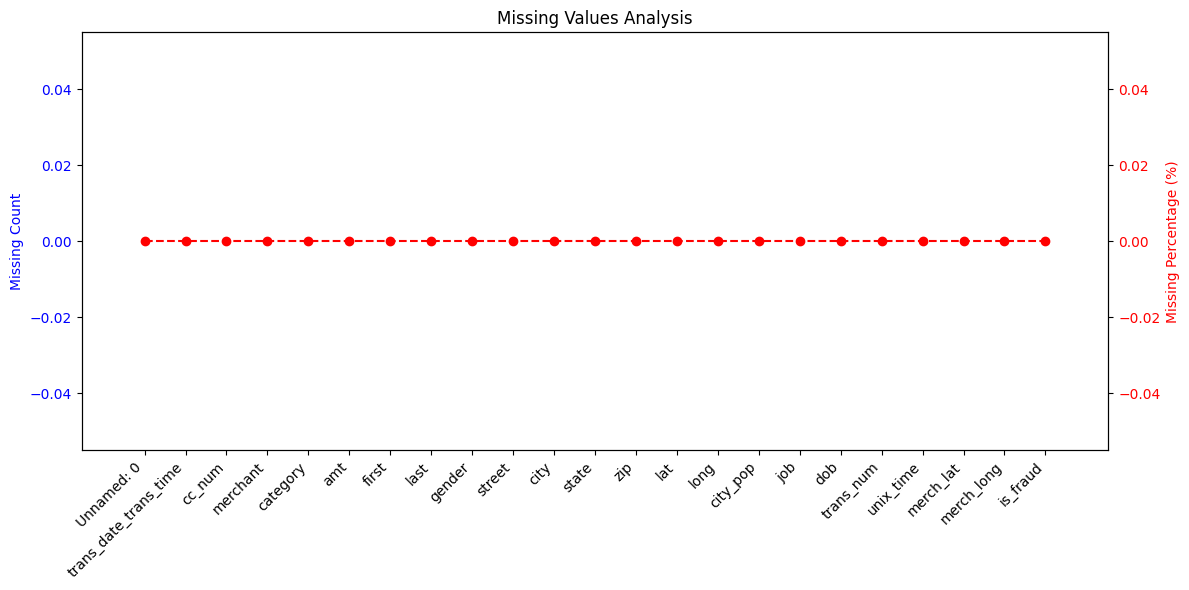

In [9]:
#===============================================================================
# %%
# MISSING VALUES STATS
def get_plot_missing_values(df):
    missing_counts = df.isnull().sum()
    missing_percentage = (missing_counts / len(df)) * 100
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.bar(df.columns, missing_counts, color='blue', alpha=0.6, label="Missing Count")
    ax1.set_ylabel("Missing Count", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(df.columns, missing_percentage, color='red', marker='o', linestyle='dashed', label="Missing %")
    ax2.set_ylabel("Missing Percentage (%)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax1.set_xticklabels(df.columns, rotation=45, ha='right')
    plt.title("Missing Values Analysis")
    plt.tight_layout()
    return fig

fig = get_plot_missing_values(fraud_data)
fig.show()



C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\40669513.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\40669513.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


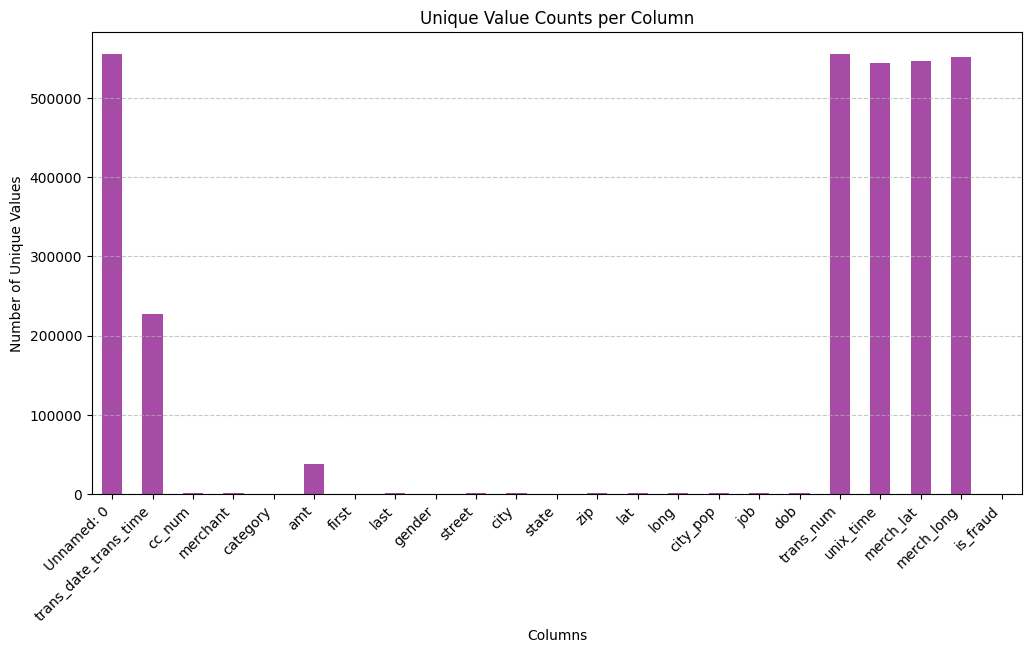

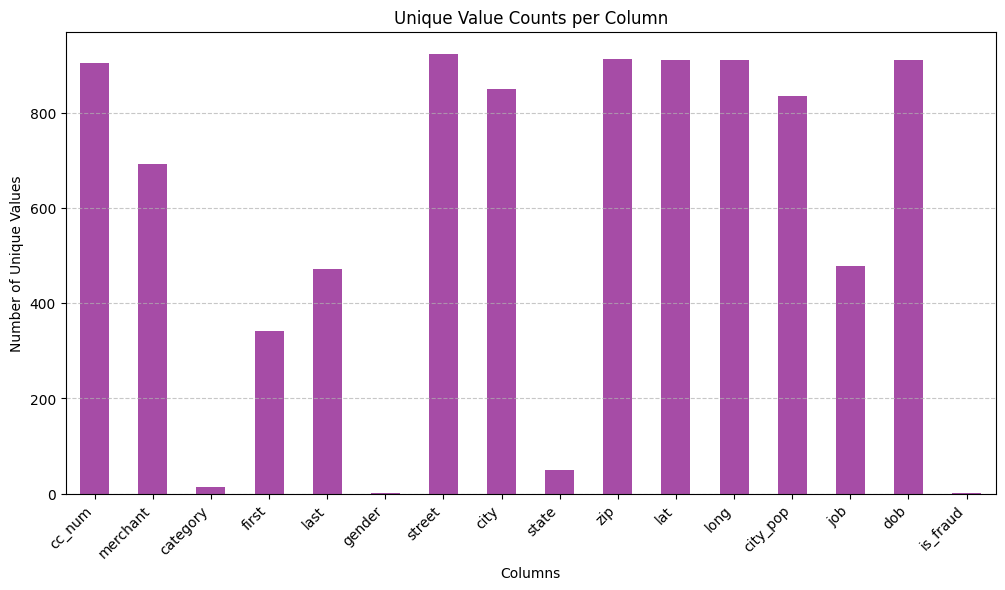

In [10]:
#===============================================================================
# %%
# UNIQUE VALUE STATS
def get_plot_unique_value_counts(df):
    unique_counts = df.nunique()
    fig, ax = plt.subplots(figsize=(12, 6))
    unique_counts.plot(kind='bar', ax=ax, color='purple', alpha=0.7)
    ax.set_xlabel("Columns")
    ax.set_ylabel("Number of Unique Values")
    ax.set_title("Unique Value Counts per Column")
    ax.set_xticklabels(df.columns, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    return fig

fig = get_plot_unique_value_counts(fraud_data)
fig.show()

columns_to_drop = [
    'Unnamed: 0', 
    'trans_date_trans_time',
    'trans_num',
    'unix_time',
    'merch_lat',
    'merch_long',
    'amt'
]
fig = get_plot_unique_value_counts(fraud_data.drop(columns=columns_to_drop))
fig.show()



<Axes: >

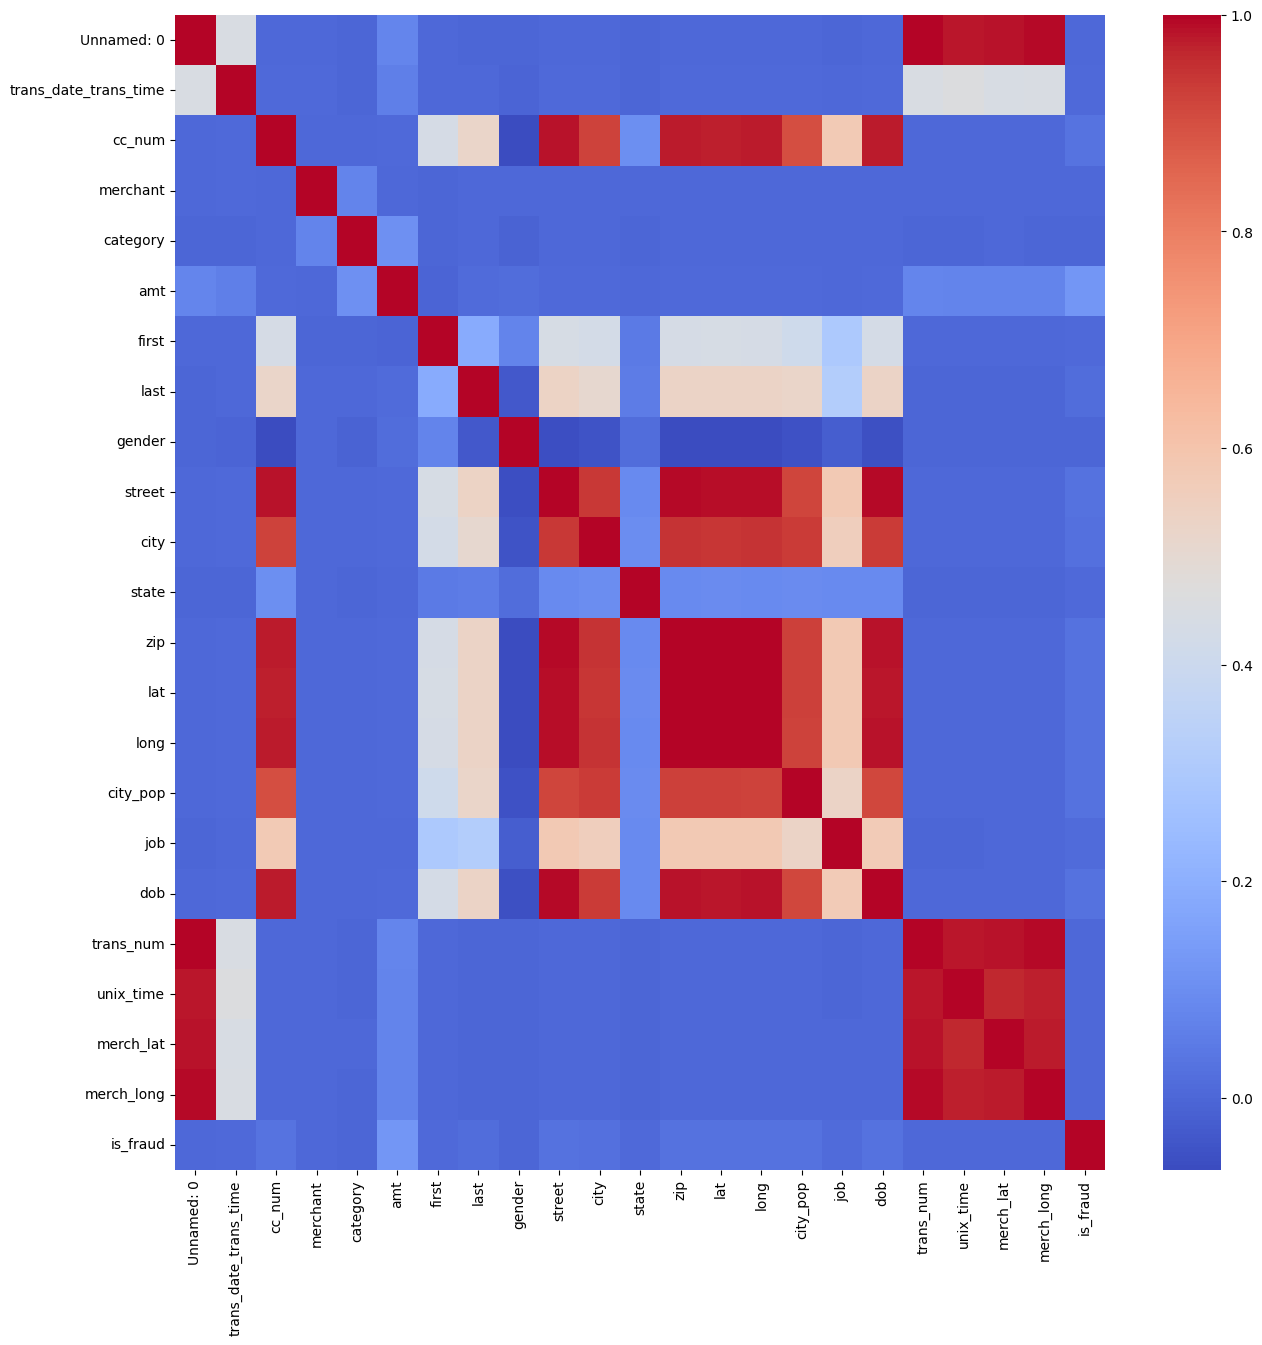

In [11]:
#===============================================================================
# %%
#* CORRELATION MATRIX
plt.figure(figsize=(15, 15))
corr = fraud_data[lambda fraud_data:[c for c in fraud_data.columns]].apply(lambda x : pd.factorize(x)[0]).corr()
sns.heatmap(corr.loc[lambda df:[c for c in fraud_data.columns],lambda fraud_data:[c for c in fraud_data.columns]],cmap='coolwarm')


In [12]:
#===============================================================================
#===============================================================================
#===============================================================================
#===============================================================================
#===============================================================================
# AMOUNT
#===============================================================================
#===============================================================================
#===============================================================================
#===============================================================================


In [13]:
#===============================================================================
# %%
# GLOBAL PARAMS
custom_bins=[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 5000, 10000, 23000]


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\3309508565.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


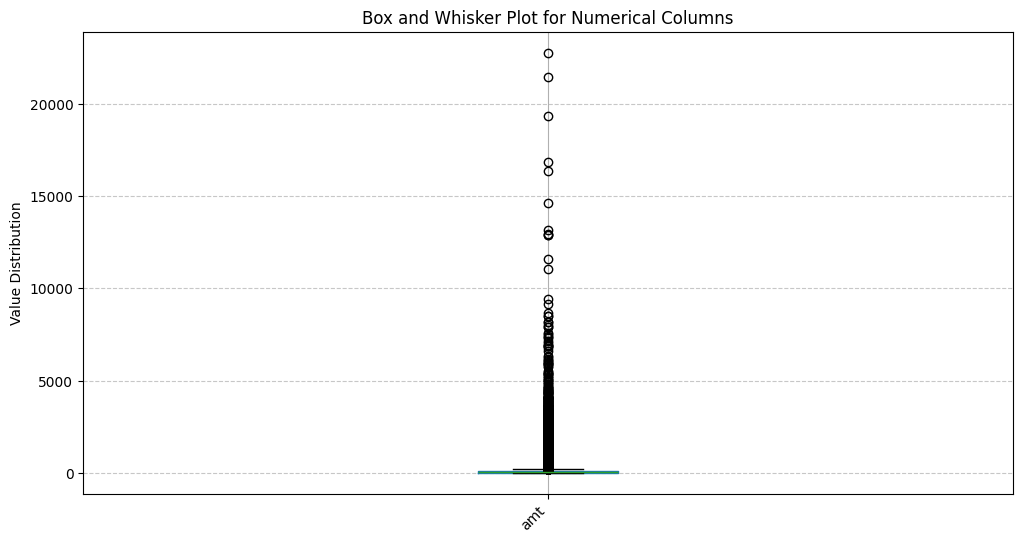

In [14]:
#===============================================================================
# %%
# AMT - box and whisker plot
def get_plot_box_whisker(df):
    num_df = df.select_dtypes(include=[np.number])
    fig, ax = plt.subplots(figsize=(12, 6))
    num_df.boxplot(ax=ax)
    ax.set_xticklabels(num_df.columns, rotation=45, ha='right')
    ax.set_ylabel("Value Distribution")
    ax.set_title("Box and Whisker Plot for Numerical Columns")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    return fig
p = get_plot_box_whisker(fraud_data[['amt']])
p.show()


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1261010729.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


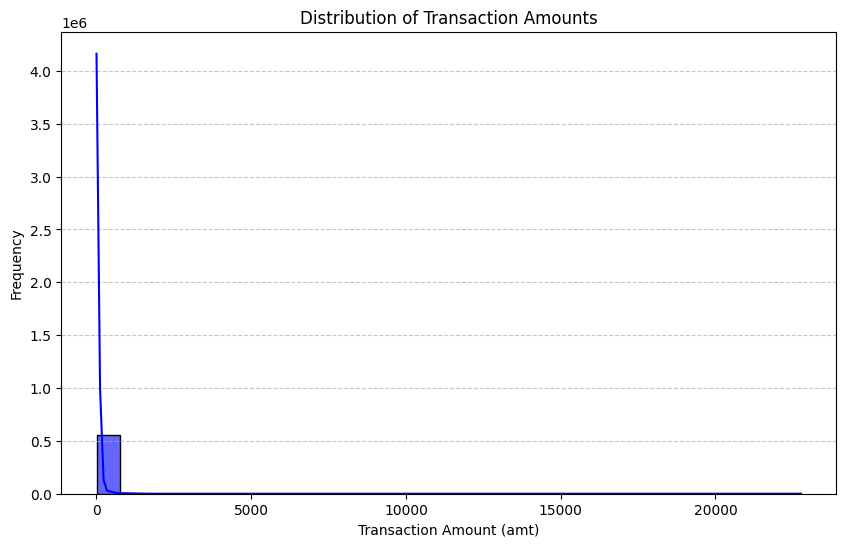

In [15]:
#===============================================================================
# %%
# AMT - distribution
def get_plot_amt_distribution(df):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df['amt'], bins=30, kde=True, color='blue', alpha=0.6, ax=ax)
    ax.set_xlabel("Transaction Amount (amt)")
    ax.set_ylabel("Frequency")
    ax.set_title("Distribution of Transaction Amounts")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    return fig
p = get_plot_amt_distribution(fraud_data)
p.show()


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\3962345386.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\3962345386.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


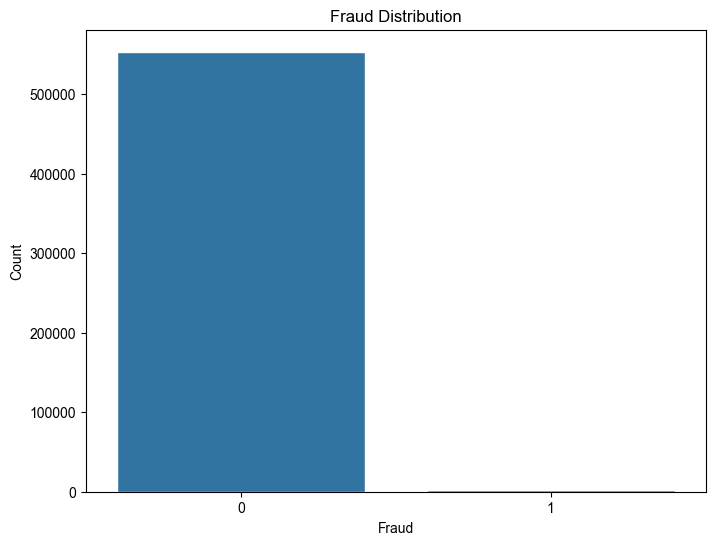

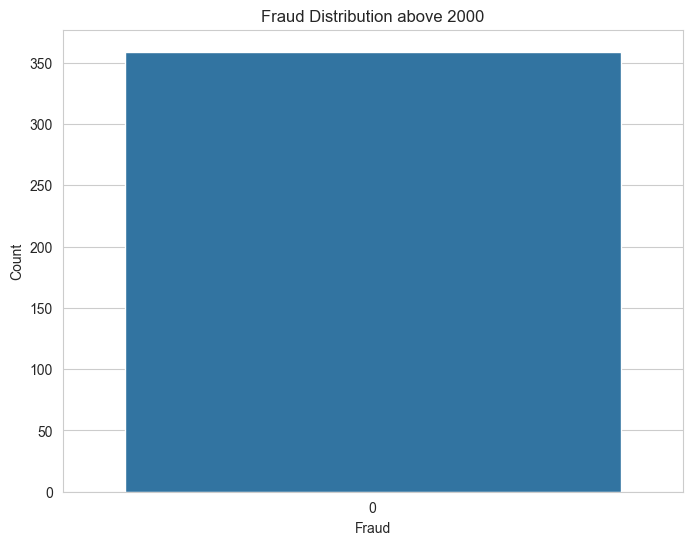

In [16]:
#===============================================================================
# %%
# PLOT AMT FRAUD DISTRIBUTION - BASIC
def get_plot_fraud_distribution(fraud_data, title='Fraud Distribution'):
    fraud_counts = fraud_data['is_fraud'].value_counts()
    fraud_counts_df = pd.DataFrame({'is_fraud': fraud_counts.index, 'count': fraud_counts.values})
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set_style("whitegrid")
    sns.barplot(x='is_fraud', y='count', data=fraud_counts_df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Fraud')
    ax.set_ylabel('Count')
    return fig

fig = get_plot_fraud_distribution(fraud_data)
fig.show()
fig = get_plot_fraud_distribution(fraud_data[fraud_data['amt'] > 2000], title = 'Fraud Distribution above 2000')
fig.show()


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1138278926.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['amt_bin', 'is_fraud']).size().unstack(fill_value=0)
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1138278926.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1138278926.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['amt_bin', 'is_fraud']).size().unstack(fill_value=0)
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1138278926.py:27: UserWarning: FigureCa

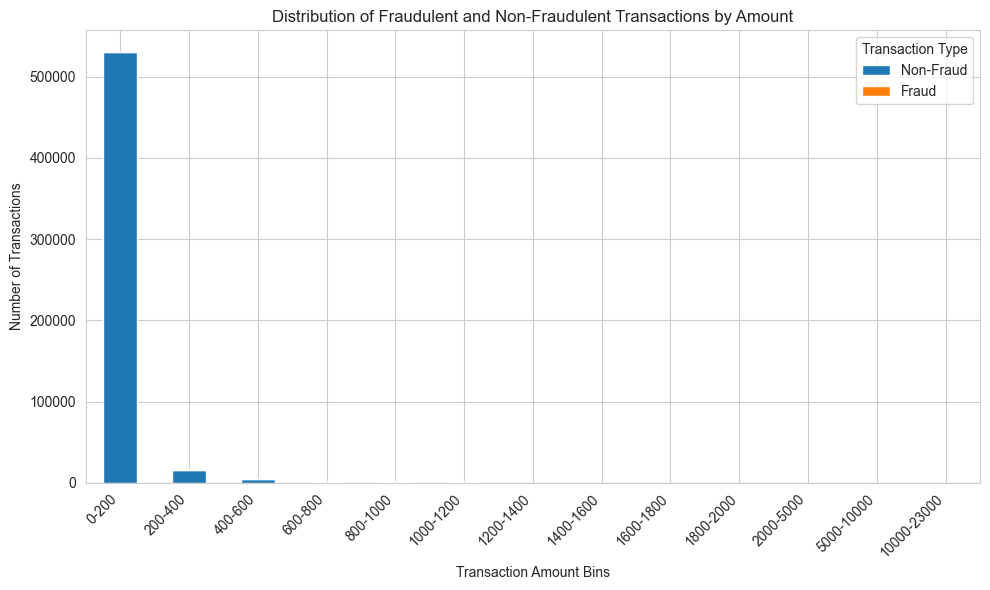

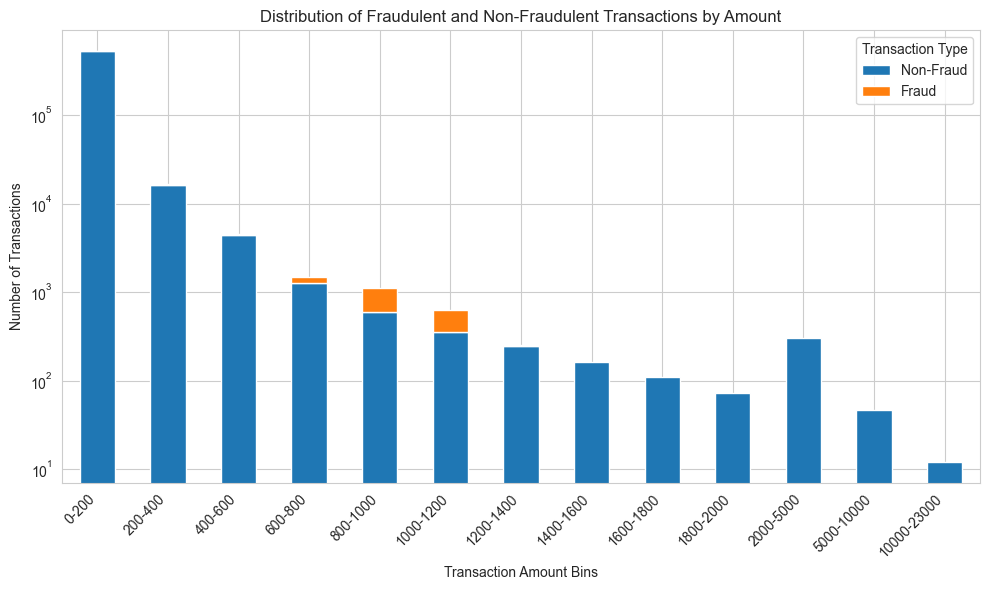

In [17]:
#===============================================================================
# %%
# PLOT AMT FRAUD DISTRIBUTION - BINNED
def get_plot_stacked_bins(df_input:DataFrame, bin_size=2000, custom_bins=None, log_scale=False):
    df = df_input.copy()
    bins = list(range(0, 23000 + bin_size, bin_size))
    if not custom_bins is None:
        bins = custom_bins
    bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    df['amt_bin'] = pd.cut(df['amt'], bins=bins, labels=bin_labels, right=False)
    grouped = df.groupby(['amt_bin', 'is_fraud']).size().unstack(fill_value=0)
    fig, ax = plt.subplots(figsize=(10, 6))
    grouped.plot(kind='bar', stacked=True, ax=ax)
    if log_scale:
        ax.set_yscale('log')
    ax.set_xlabel("Transaction Amount Bins")
    ax.set_ylabel("Number of Transactions")
    ax.set_title("Distribution of Fraudulent and Non-Fraudulent Transactions by Amount")
    ax.set_xticklabels(bin_labels, rotation=45, ha="right")
    ax.legend(["Non-Fraud", "Fraud"], title="Transaction Type")
    plt.tight_layout()
    return fig

p = get_plot_stacked_bins(fraud_data, bin_size=2000, custom_bins=custom_bins, log_scale=False)
p.show()
p = get_plot_stacked_bins(fraud_data, bin_size=2000, custom_bins=custom_bins, log_scale=True)
p.show()


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\3880825746.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts = df.groupby('amt_bin')['is_fraud'].sum()
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\3880825746.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('amt_bin')['is_fraud'].count()
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\3880825746.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


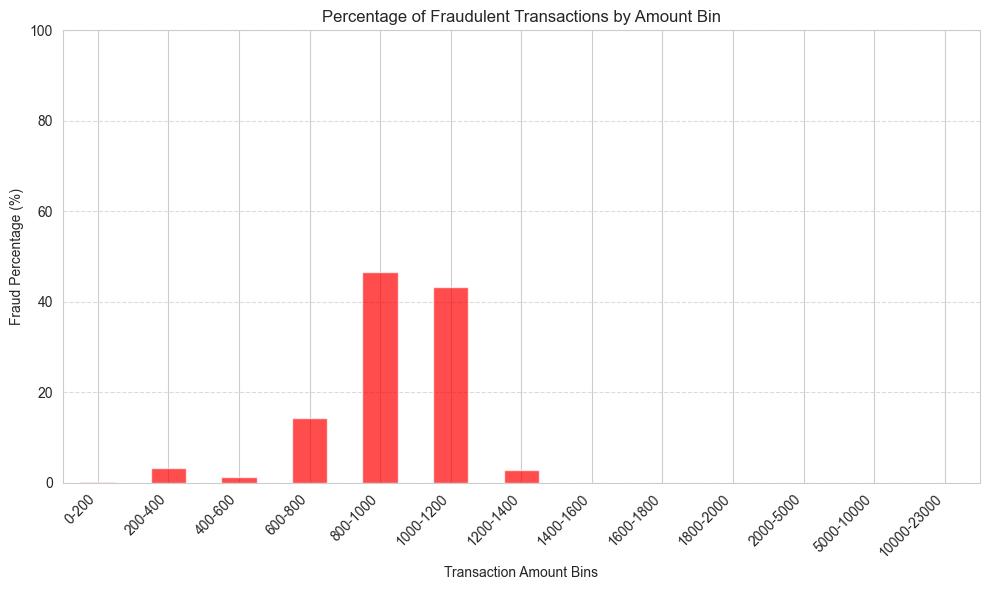

In [18]:
#===============================================================================
# %%
# PLOT AMT FRAUD DISTRIBUTION - BINNED - PERCENTAGE
def get_plot_fraud_percentage_by_bin(df_input:DataFrame, custom_bins):
    df = df_input.copy()
    bins = custom_bins
    bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    df['amt_bin'] = pd.cut(df['amt'], bins=bins, labels=bin_labels, right=False)
    fraud_counts = df.groupby('amt_bin')['is_fraud'].sum()
    total_counts = df.groupby('amt_bin')['is_fraud'].count()
    fraud_percentage = (fraud_counts / total_counts) * 100
    fig, ax = plt.subplots(figsize=(10, 6))
    fraud_percentage.plot(kind='bar', color='red', alpha=0.7, ax=ax)
    ax.set_xlabel("Transaction Amount Bins")
    ax.set_ylabel("Fraud Percentage (%)")
    ax.set_title("Percentage of Fraudulent Transactions by Amount Bin")
    ax.set_xticklabels(bin_labels, rotation=45, ha="right")
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    return fig
p = get_plot_fraud_percentage_by_bin(fraud_data, custom_bins=custom_bins)
p.show()


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\24637435.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


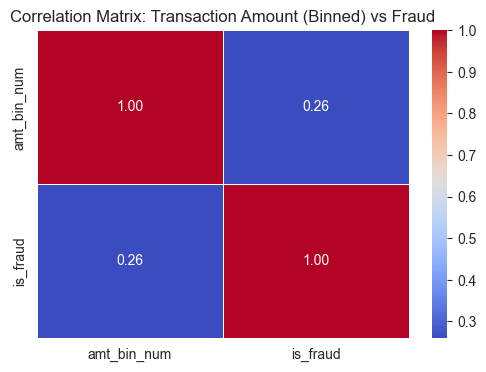

In [19]:
#===============================================================================
# %%
# CORRELATION MATRIX
def get_plot_correlation_matrix(df_input, custom_bins):
    df = df_input.copy()
    bins = custom_bins
    bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    df['amt_bin'] = pd.cut(df['amt'], bins=bins, labels=bin_labels, right=False)
    df['amt_bin_num'] = df['amt_bin'].cat.codes
    corr_matrix = df[['amt_bin_num', 'is_fraud']].corr()
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title("Correlation Matrix: Transaction Amount (Binned) vs Fraud")
    return fig
p = get_plot_correlation_matrix(fraud_data, custom_bins)
p.show()


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1022615471.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


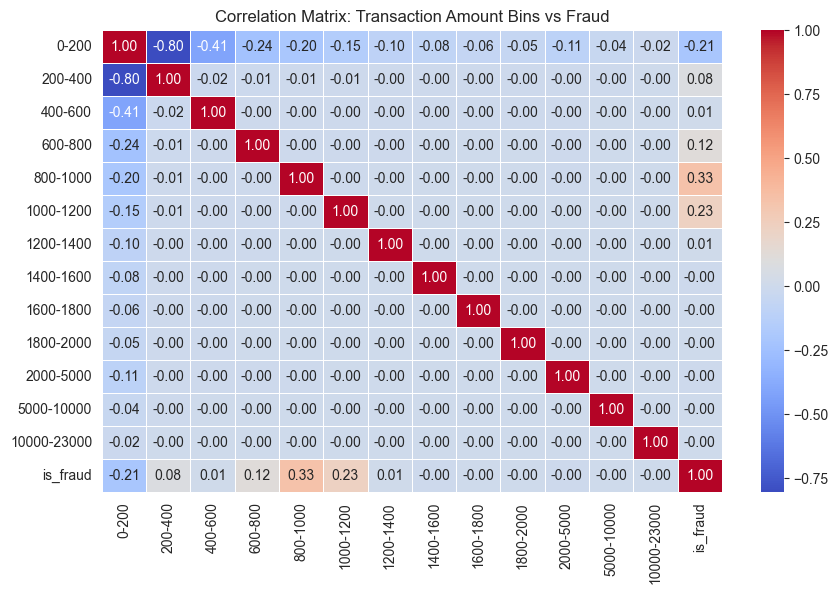

In [20]:
#===============================================================================
# %%
# CORRELATION MATRIX PER BIN
def get_plot_correlation_matrix_per_bin(df_input, custom_bins):
    df = df_input.copy()
    bins = custom_bins
    bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    df['amt_bin'] = pd.cut(df['amt'], bins=bins, labels=bin_labels, right=False)
    bin_dummies = pd.get_dummies(df['amt_bin'])
    df_encoded = pd.concat([bin_dummies, df['is_fraud']], axis=1)
    corr_matrix = df_encoded.corr()
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title("Correlation Matrix: Transaction Amount Bins vs Fraud")
    return fig
p = get_plot_correlation_matrix_per_bin(fraud_data, custom_bins)
p.show()


In [21]:
#===============================================================================
#===============================================================================
#===============================================================================
#===============================================================================
#===============================================================================
#===============================================================================


In [22]:
#===============================================================================
# %%
def get_plot_customers_location_map(fraud_data, title, longitude_column, latitude_column, color_name = 'blue'):
    # gdf = gpd.GeoDataFrame(fraud_data, geometry=gpd.points_from_xy(fraud_data.long, fraud_data.lat), crs="EPSG:4326")
    gdf = gpd.GeoDataFrame(fraud_data, geometry=gpd.points_from_xy(fraud_data[longitude_column], fraud_data[latitude_column]), crs="EPSG:4326")
    world = gpd.read_file(get_path("naturalearth.land"))
    gdf = gdf.to_crs(epsg=3857)
    # world = world.to_crs(epsg=3857) # to powoduje ściśnięcie
    fig, ax = plt.subplots(figsize=(20, 15))
    world.plot(ax=ax, color="white", edgecolor="black")
    gdf.plot(ax=ax, color=color_name, markersize=10)
    ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    return fig


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1676788385.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\1676788385.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


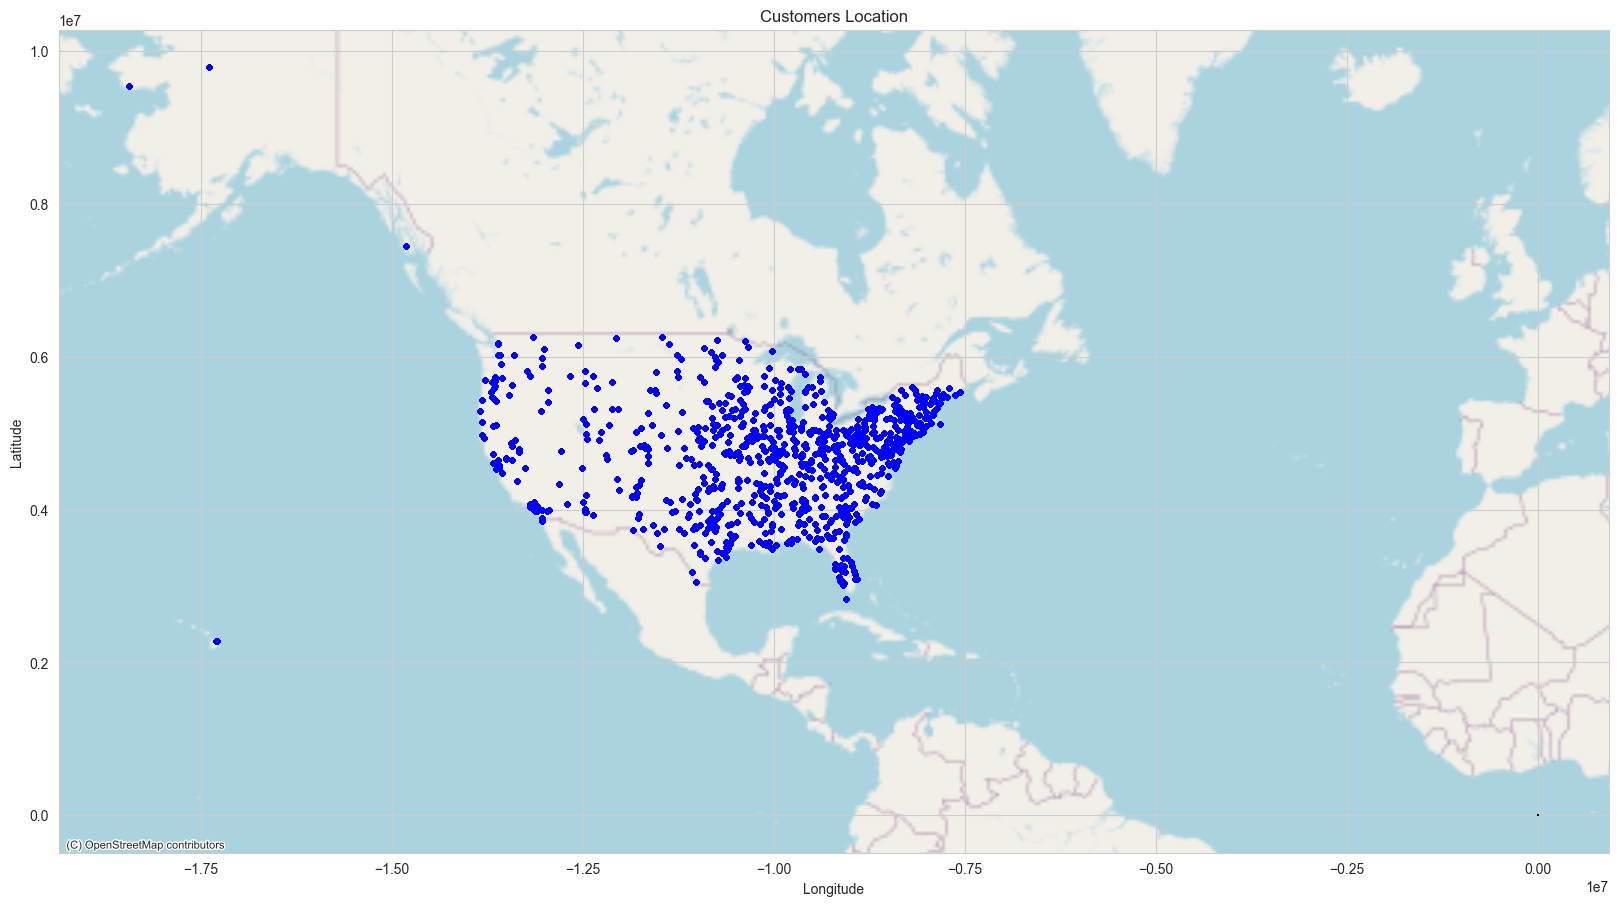

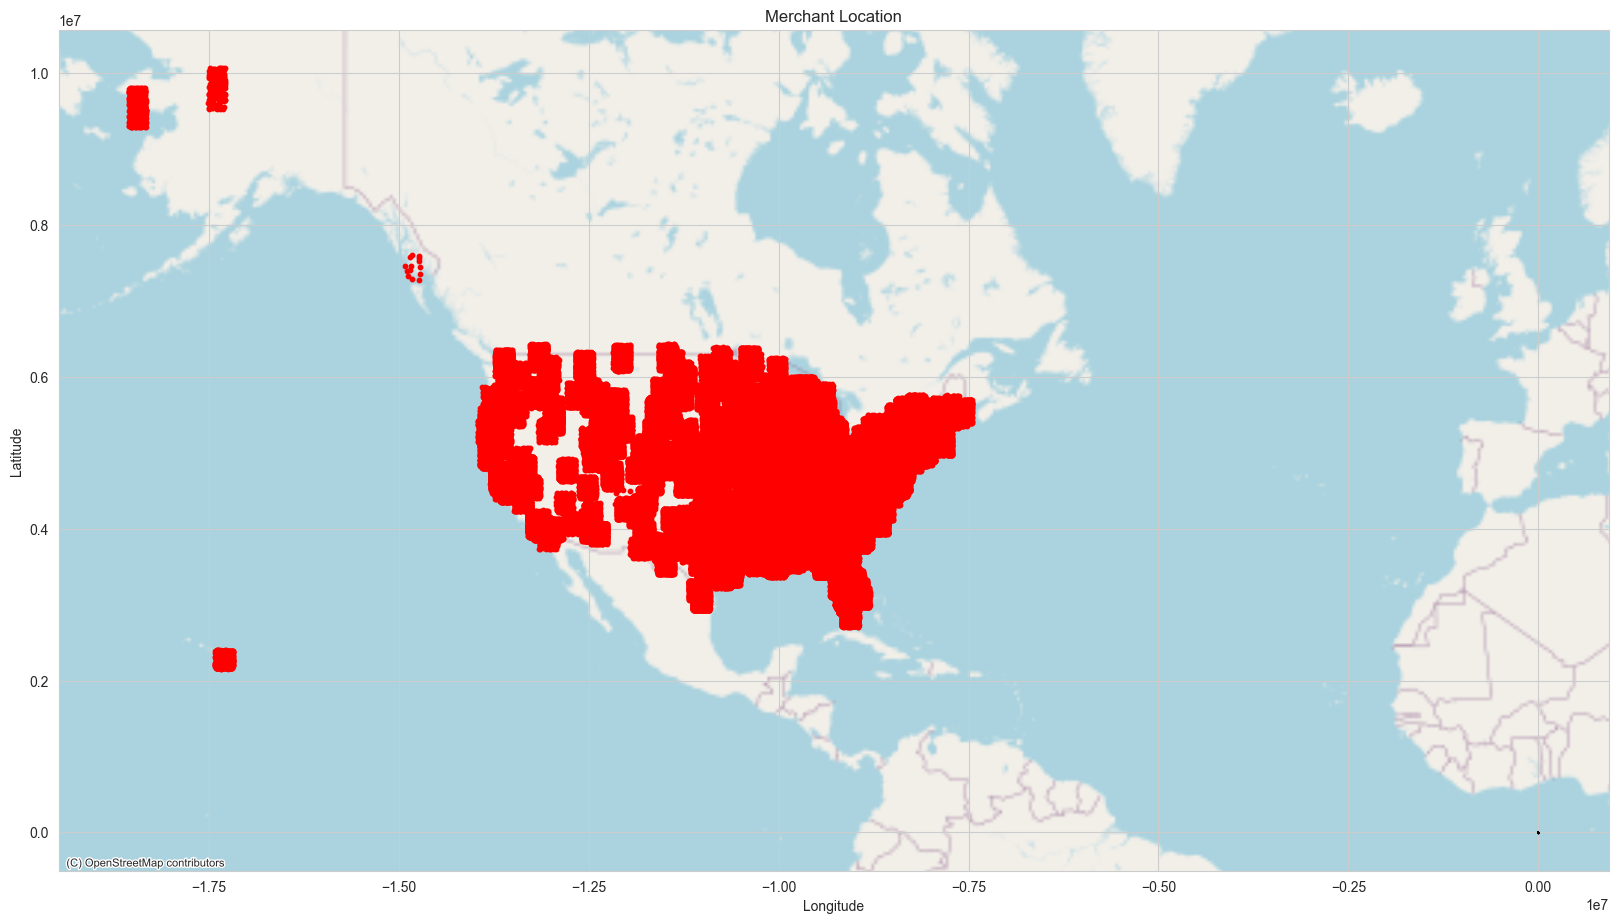

In [23]:
#===============================================================================
# %%
# Customers location map
p = get_plot_customers_location_map(fraud_data, 
    title = 'Customers Location', longitude_column='long', latitude_column='lat', color_name='blue')
p.show()
#===============================================================================
# %%
# Merchant location map
p = get_plot_customers_location_map(fraud_data, 
    title = 'Merchant Location', longitude_column='merch_long', latitude_column='merch_lat', color_name='red')
p.show()


In [24]:
#===============================================================================
# %%
def get_plot_fraud_density_map(fraud_data, title, longitude_column, latitude_column, color_map='Reds'):
    gdf = gpd.GeoDataFrame(fraud_data, geometry=gpd.points_from_xy(fraud_data[longitude_column], fraud_data[latitude_column]), crs="EPSG:4326")
    fraud_counts = gdf.groupby(['geometry'])['is_fraud'].sum().reset_index()
    fraud_counts['fraud_level'] = fraud_counts['is_fraud']  # Number of fraud cases at each location
    fraud_gdf = gpd.GeoDataFrame(fraud_counts, geometry='geometry', crs="EPSG:4326")
    world = gpd.read_file(get_path("naturalearth.land"))
    fraud_gdf = fraud_gdf.to_crs(epsg=3857)
    fig, ax = plt.subplots(figsize=(20, 15))
    # world.to_crs(epsg=3857)
    world.plot(ax=ax, color="white", edgecolor="black")
    fraud_gdf.plot(ax=ax, column='fraud_level', cmap=color_map, markersize=50, alpha=0.7, legend=True)
    ctx.add_basemap(ax, crs=fraud_gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)
    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    return fig


C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\2184126042.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
C:\Users\jaros\AppData\Local\Temp\ipykernel_9920\2184126042.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


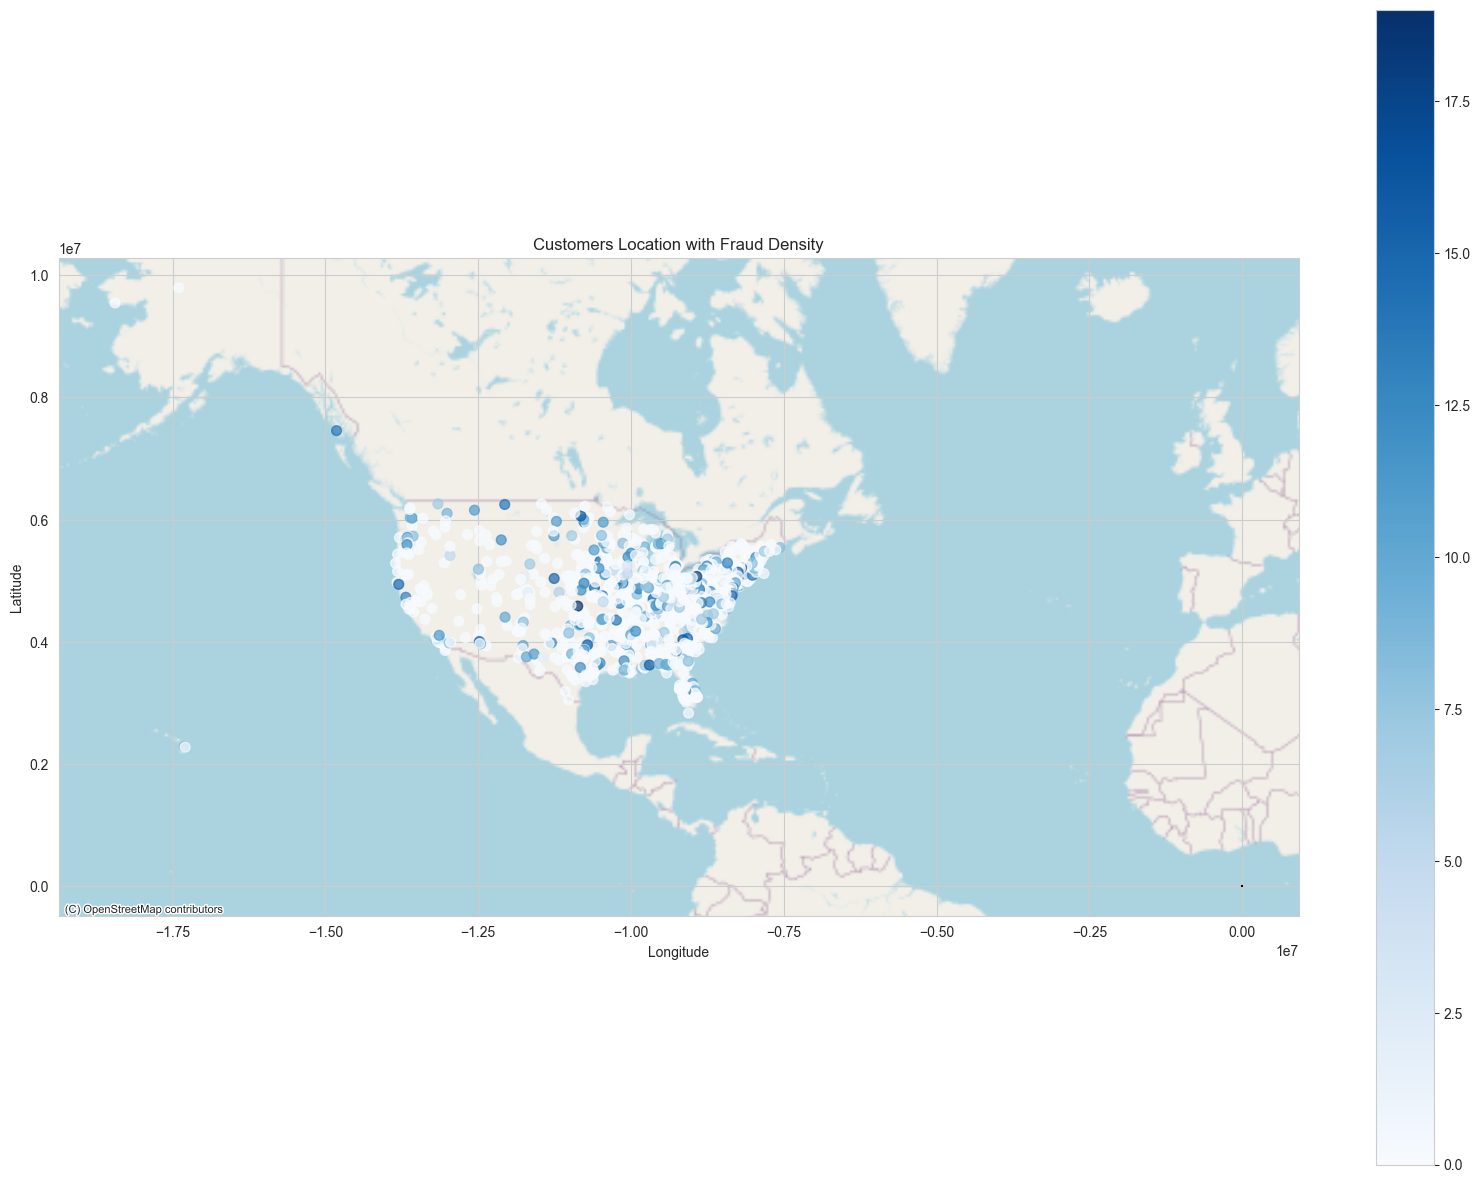

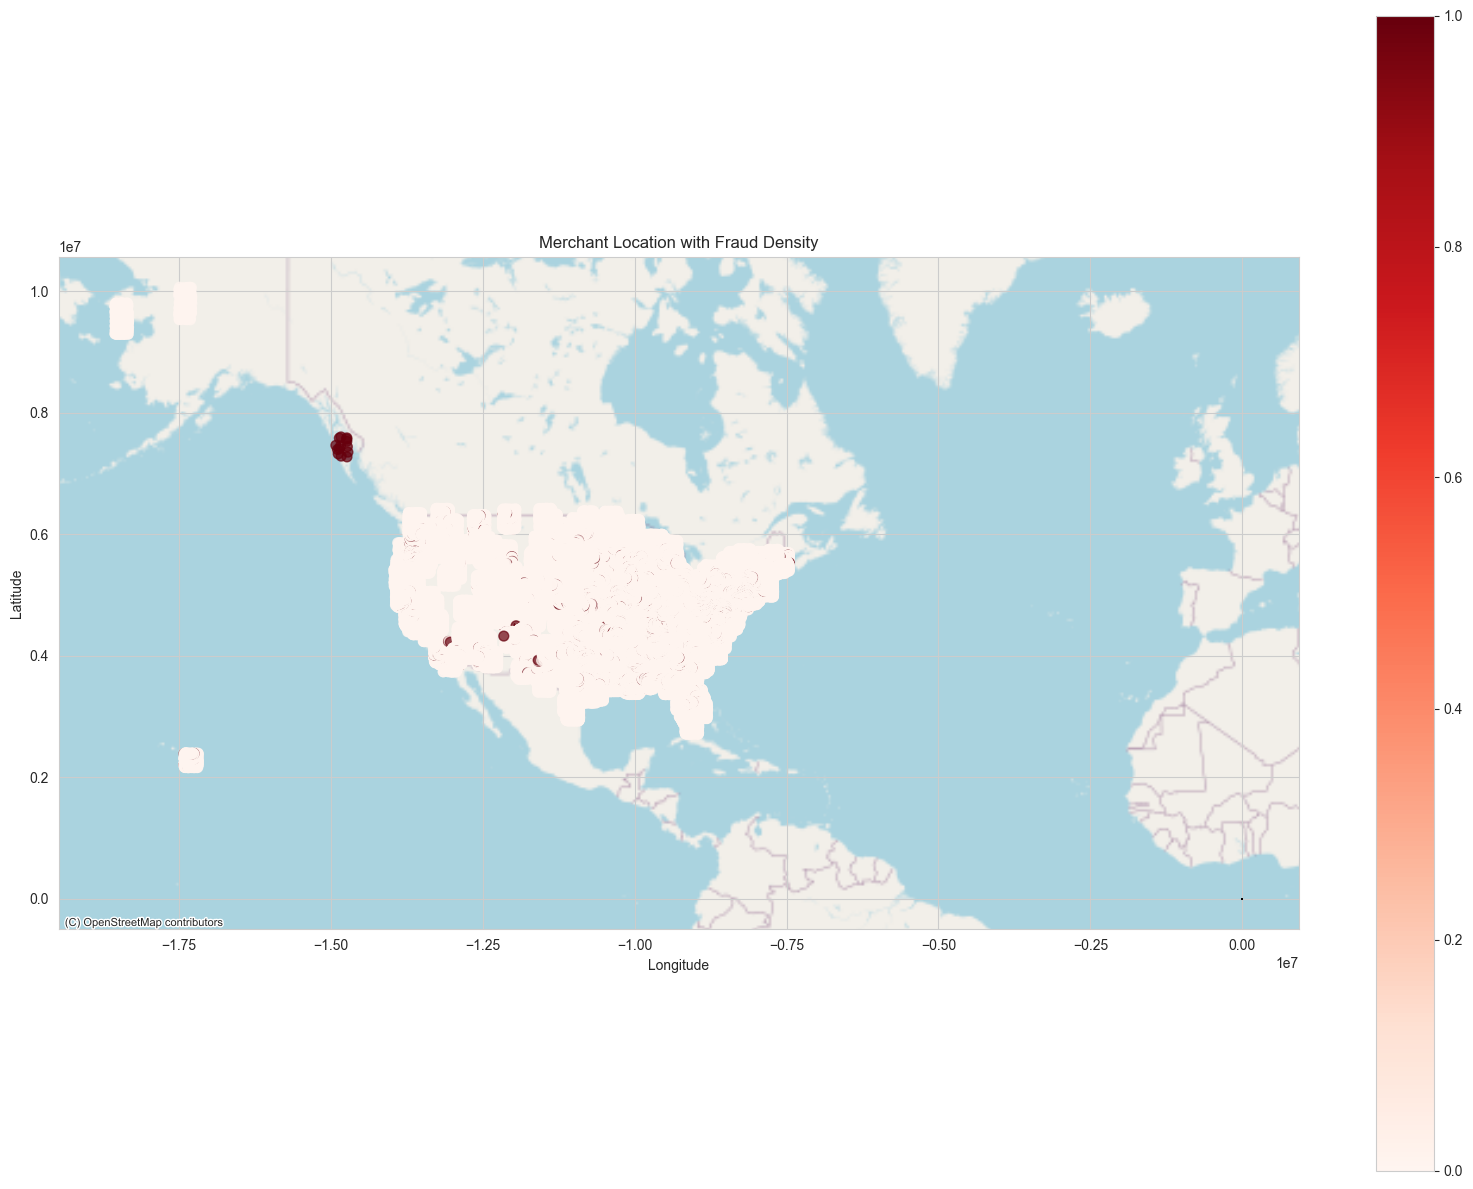

In [25]:
#===============================================================================
# %%
# Customers Location with Fraud Density
f = get_plot_fraud_density_map(fraud_data, 
    title = 'Customers Location with Fraud Density', 
    longitude_column='long', latitude_column='lat', color_map='Blues')
f.show()
#===============================================================================
# %%
# Merchant Location with Fraud Density
f = get_plot_fraud_density_map(fraud_data, 
    title = 'Merchant Location with Fraud Density', 
    longitude_column='merch_long', latitude_column='merch_lat', color_map='Reds')
f.show()
